## Name - Tarmeem Fatima

## TASK-1 : Prediction using Supervised ML

**Problem Statement:** What will be predicted score if a student studies for 9.25 hrs/ day?


**Importing required libraries**

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

**Loading  data from remote CSV link**

In [2]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data loaded successfully")

s_data.head()

Data loaded successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Visualising the dataset**

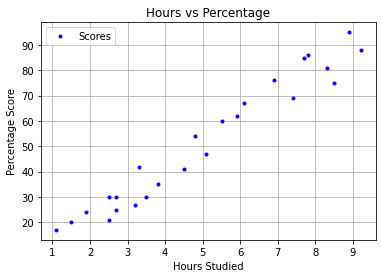

In [8]:
s_data.plot(x='Hours', y='Scores', style='.', color='blue')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

**Splitting Data into Inputs and Outputs**

In [26]:
# using iloc we will divide the data
X=s_data.iloc[:, :1].values
y=s_data.iloc[:, 1:].values

In [27]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [28]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

**Splitting data into training and testing data**

In [59]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

**Training the Algorithm**

We have splitted data into training and testing sets,and now we will train our model. 

In [60]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


**Plotting the regression line**

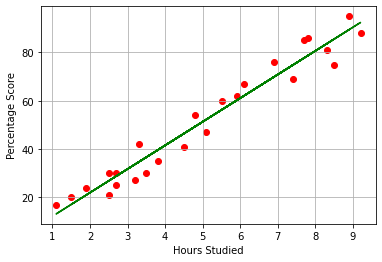

In [61]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='r')
plt.plot(X, line, color='g')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

**Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [62]:
print(X_test) 
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [63]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()}) 
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


**Predict Score if Student studies for 9.25 hours**

In [64]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [92.91505723]


 **Evaluate the model to check performance using mean_absolute_error**

In [65]:
from sklearn import metrics  

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652
